In [1]:
from ast import literal_eval
import pandas as pd
import numpy as np

In [2]:
def read_data(filename):
    data = pd.read_csv(filename, encoding = "ISO-8859-1")
    #data['tags'] = data['tags'].apply(literal_eval)
    return data

In [3]:
train = read_data('data/train.csv')

In [4]:
train.head()

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0


In [5]:
from sklearn.model_selection import train_test_split

In [6]:
categories = ['toxic', 'severe_toxic', 'obscene', 'threat', 'insult', 'identity_hate']
train, test = train_test_split(train, random_state=42, test_size=0.1, shuffle=True)
#X_train = train.comment_text
#X_test = test.comment_text
print(train.shape)
print(test.shape)

(143613, 8)
(15958, 8)


In [20]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

In [10]:
def count_labels_per_category(df):
    
    df_toxic = df.drop(['id', 'comment_text'], axis=1)
    counts = []
    categories = list(df_toxic.columns.values)
    for i in categories:
        counts.append((i, df_toxic[i].sum()))
    df_stats = pd.DataFrame(counts, columns=['category', 'number_of_comments'])
    return df_stats

In [14]:
df_stats_train = count_labels_per_category(train)
df_stats_train

,category,number_of_comments
0,toxic,13814
1,severe_toxic,1447
2,obscene,7613
3,threat,441
4,insult,7086
5,identity_hate,1258


In [15]:
df_stats_test = count_labels_per_category(test)
df_stats_test

,category,number_of_comments
0,toxic,1480
1,severe_toxic,148
2,obscene,836
3,threat,37
4,insult,791
5,identity_hate,147


In [16]:
def plot_count_labels_per_category(df_stats):
    df_stats.plot(x='category', y='number_of_comments', kind='bar', legend=False, grid=True, figsize=(8, 5))
    plt.title("Number of comments per category")
    plt.ylabel('# of Occurrences', fontsize=12)
    plt.xlabel('category', fontsize=12)

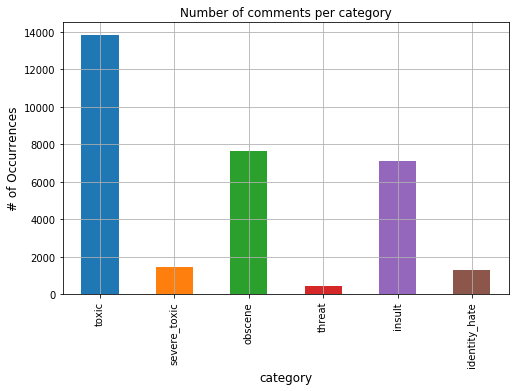

In [22]:
plot_count_labels_per_category(df_stats_train)

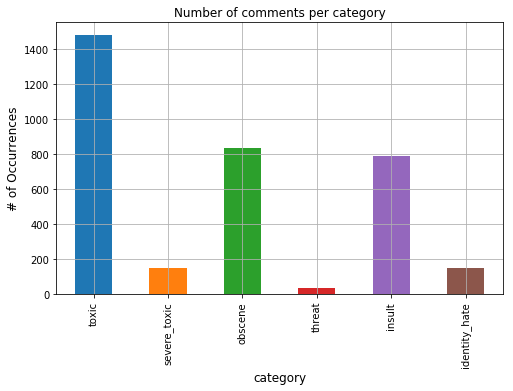

In [23]:
plot_count_labels_per_category(df_stats_test)

In [24]:
train.to_pickle('./data/train.pkl')
test.to_pickle('./data/test.pkl')